In [ ]:
#Connecting with the Google drive.
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#Acquire Data - Setting up the paths
train_path = '/content/drive/MyDrive/MLOM/Lab04/Cat&Dog Dataset/Training_data'
test_path = '/content/drive/MyDrive/MLOM/Lab04/Cat&Dog Dataset/Testing_data'

In [ ]:
#Importing Necessary Tensorflow and Keras Libraries
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Building the Model.

model = tf.keras.models.Sequential([
    #Note that the input size is the desired size of the image 300 x 300 with 3 bytes color

    #This is the first convolution
    tf.keras.layers.Conv2D(filters=16,kernel_size=3, activation='relu', input_shape=(300, 300, 3)), # no of neuron = 300x300x3
    tf.keras.layers.MaxPooling2D(2,2),  #MaxPooling2D = Catch maximum value for 2 by 2 blog

    #This is the second convolution
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    #This is the third convolution layer
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    #This is the fourth convolution
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    #This is the Fifth convolution
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = 2),

    #Now Flatten the results to feed into DNN
    tf.keras.layers.Flatten(),

    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),

    #Only 1 output neuron
      #It will contain a value from 0-1 where 0 for 1 class('Cat') and 1 for the other ('Dog')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#To get model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 32)       0

In [ ]:
#compile the model
#from keras.callbacks import optimizer

#give learning rate as 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
#rescalling things in there

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All train image will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, # this is the source directory for training images
                                                    target_size = (300, 300), # All images will be resized be resized to 150x150
                                                    batch_size = 32,
                                                    #since we use binary_crossentrop loss, we need binary labels
                                                    class_mode = 'binary'
                                                    )
#All test images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)
#apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size =(300, 300),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,#number of batches for epoch
    epochs=5,
    validation_data=test_set,
    validation_steps=7 #number of batches for validation
)

Epoch 1/5
20/20 [==============================] - 116s 6s/step - loss: 0.6558 - accuracy: 0.6066 - val_loss: 0.6818 - val_accuracy: 0.5050
Epoch 2/5
20/20 [==============================] - 55s 3s/step - loss: 0.6377 - accuracy: 0.6209 - val_loss: 0.6631 - val_accuracy: 0.5750
Epoch 3/5
20/20 [==============================] - 55s 3s/step - loss: 0.6157 - accuracy: 0.6540 - val_loss: 0.6519 - val_accuracy: 0.6000
Epoch 4/5
20/20 [==============================] - 62s 3s/step - loss: 0.5967 - accuracy: 0.6840 - val_loss: 0.6899 - val_accuracy: 0.5950
Epoch 5/5
20/20 [==============================] - 56s 3s/step - loss: 0.5494 - accuracy: 0.7030 - val_loss: 0.6354 - val_accuracy: 0.6700


In [ ]:
#save weight for future prediction
model.save_weights('first_try.h5')

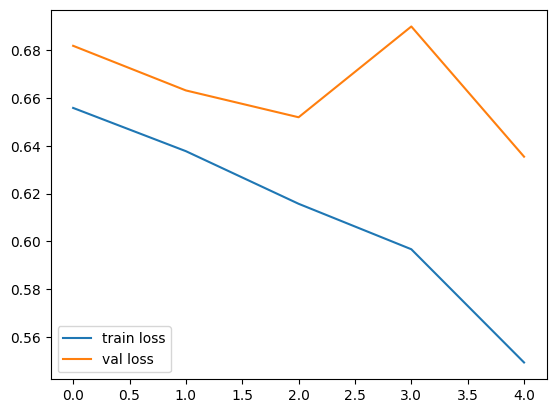

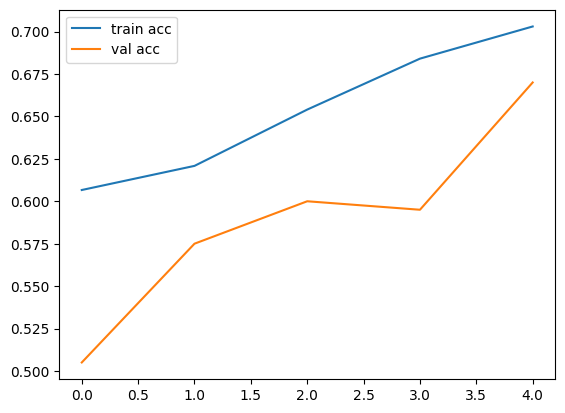

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot variation in loss and accuracy
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')